In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
import random
import warnings
warnings.filterwarnings("ignore")

In [62]:
df = pd.read_csv("fifa_cleaned.csv")
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [63]:
df.shape

(17954, 92)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
id                               17954 non-null int64
name                             17954 non-null object
full_name                        17954 non-null object
birth_date                       17954 non-null object
age                              17954 non-null int64
height_cm                        17954 non-null float64
weight_kgs                       17954 non-null float64
positions                        17954 non-null object
nationality                      17954 non-null object
overall_rating                   17954 non-null int64
potential                        17954 non-null int64
value_euro                       17699 non-null float64
wage_euro                        17708 non-null float64
preferred_foot                   17954 non-null object
international_reputation(1-5)    17954 non-null int64
weak_foot(1-5)                   17954 non-null int64
skill_moves(1

In [65]:
cor= df.corr()
cor_target = cor["overall_rating"]
relevant_features = cor_target[cor_target.between(-0.5,0.5,inclusive =True)]
relevant_features

id                              -0.421439
age                              0.461529
height_cm                        0.038080
weight_kgs                       0.150521
international_reputation(1-5)    0.489416
weak_foot(1-5)                   0.216394
skill_moves(1-5)                 0.418718
club_jersey_number              -0.210828
national_jersey_number          -0.104753
crossing                         0.398343
finishing                        0.342331
heading_accuracy                 0.347670
volleys                          0.396922
dribbling                        0.378718
curve                            0.423890
freekick_accuracy                0.400878
long_passing                     0.489998
ball_control                     0.464336
acceleration                     0.204853
sprint_speed                     0.218443
agility                          0.275260
balance                          0.114667
shot_power                       0.445306
jumping                          0

In [66]:
correlated_dataframe = df.loc[:,["age","height_cm","weight_kgs","overall_rating","preferred_foot",
                    "international_reputation(1-5)",
                    "weak_foot(1-5)","skill_moves(1-5)",
                    "club_jersey_number","national_jersey_number","crossing",
                    "finishing","heading_accuracy","volleys","dribbling","curve",
                    "freekick_accuracy","long_passing","ball_control","acceleration","sprint_speed",
                    "agility","balance","shot_power","jumping","stamina","strength",
                    "long_shots","aggression","interceptions","positioning","penalties",
                    "marking","standing_tackle","sliding_tackle",
                    "GK_diving","GK_handling","GK_kicking","GK_positioning","GK_reflexes"]]
correlated_dataframe.head()

,age,height_cm,weight_kgs,overall_rating,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),club_jersey_number,national_jersey_number,...,positioning,penalties,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,31,170.18,72.1,94,Left,5,4,4,10.0,10.0,...,94,75,33,28,26,6,11,15,14,8
1,27,154.94,76.2,88,Right,3,5,4,23.0,10.0,...,84,67,59,57,22,9,14,7,7,6
2,25,190.50,83.9,88,Right,4,4,5,6.0,6.0,...,82,82,63,67,67,5,6,2,4,3
3,27,162.56,59.0,88,Right,3,4,4,24.0,10.0,...,83,61,51,24,22,8,4,14,9,10
4,27,187.96,88.9,88,Right,3,3,2,26.0,NaN,...,24,33,91,88,87,7,11,7,13,5


In [67]:
correlated_dataframe.shape

(17954, 40)

In [68]:
correlated_dataframe.isna().sum()

age                                  0
height_cm                            0
weight_kgs                           0
overall_rating                       0
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
club_jersey_number                  14
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
volleys                              0
dribbling                            0
curve                                0
freekick_accuracy                    0
long_passing                         0
ball_control                         0
acceleration                         0
sprint_speed                         0
agility                              0
balance                              0
shot_power                           0
jumping                              0
stamina                  

In [69]:
final_data = correlated_dataframe
final_data = final_data.drop(['national_jersey_number'], axis = 1)

In [70]:
final_data = final_data.dropna()

In [71]:
final_data.shape

(17940, 39)

In [72]:
final_data['international_reputation(1-5)'] = final_data['international_reputation(1-5)'].astype(object)
final_data['weak_foot(1-5)'] = final_data['weak_foot(1-5)'].astype(object)
final_data['skill_moves(1-5)'] = final_data['skill_moves(1-5)'].astype(object)

In [73]:
final_data.columns

Index(['age', 'height_cm', 'weight_kgs', 'overall_rating', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'club_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'GK_diving', 'GK_handling',
       'GK_kicking', 'GK_positioning', 'GK_reflexes'],
      dtype='object')

In [74]:
final_data.describe()

,age,height_cm,weight_kgs,overall_rating,club_jersey_number,crossing,finishing,heading_accuracy,volleys,dribbling,...,positioning,penalties,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,...,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000
mean,25.563099,174.948800,75.302742,66.243701,20.297324,49.702954,45.359197,52.149164,42.757692,55.283222,...,49.863099,48.356132,47.163266,47.732664,45.706800,16.786343,16.558640,16.389744,16.542085,16.876310
std,4.704985,14.031572,7.084117,6.963758,16.464734,18.483660,19.642307,17.524514,17.806038,19.094535,...,19.695791,15.810760,20.034358,21.675153,21.285639,17.898033,17.112462,16.703760,17.234943,18.186292
min,17.000000,152.400000,49.900000,47.000000,1.000000,5.000000,2.000000,4.000000,3.000000,4.000000,...,2.000000,5.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,154.940000,69.900000,62.000000,9.000000,38.000000,30.000000,44.000000,30.000000,49.000000,...,38.000000,38.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,175.260000,74.800000,66.000000,18.000000,54.000000,49.000000,56.000000,44.000000,61.000000,...,55.000000,49.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,185.420000,79.800000,71.000000,27.000000,64.000000,62.000000,64.000000,57.000000,68.000000,...,64.000000,60.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,46.000000,205.740000,110.200000,94.000000,99.000000,93.000000,95.000000,94.000000,90.000000,97.000000,...,95.000000,92.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


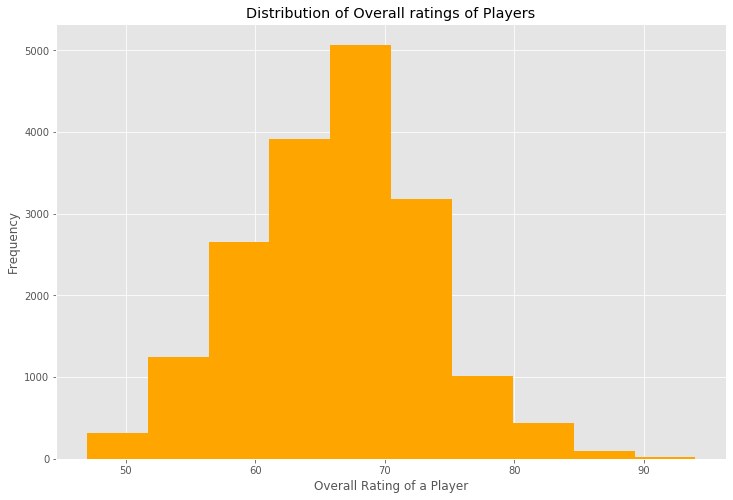

In [42]:
plt.figure(figsize=(12,8))
plt.hist(x = final_data['overall_rating'],color = "orange")
plt.xlabel("Overall Rating of a Player")
plt.ylabel("Frequency")
plt.title("Distribution of Overall ratings of Players")
plt.show()

Text(0.5, 1.0, 'International Reputation of Players')

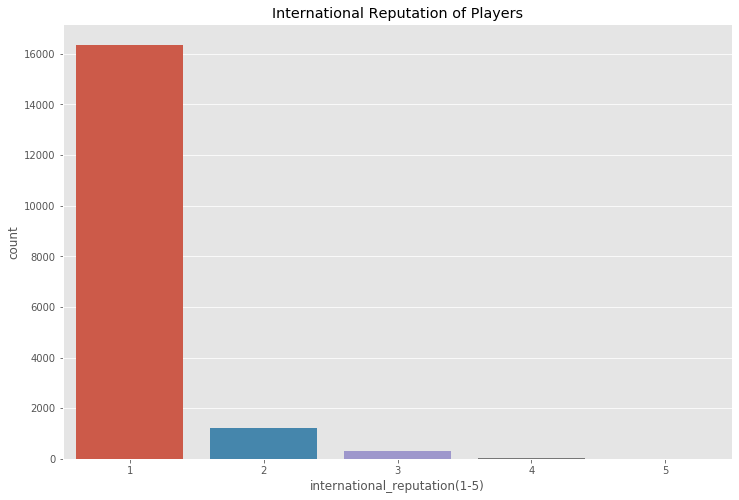

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'international_reputation(1-5)', data = final_data)
plt.title("International Reputation of Players")

In [44]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17940 entries, 0 to 17953
Data columns (total 39 columns):
age                              17940 non-null int64
height_cm                        17940 non-null float64
weight_kgs                       17940 non-null float64
overall_rating                   17940 non-null int64
preferred_foot                   17940 non-null object
international_reputation(1-5)    17940 non-null object
weak_foot(1-5)                   17940 non-null object
skill_moves(1-5)                 17940 non-null object
club_jersey_number               17940 non-null float64
crossing                         17940 non-null int64
finishing                        17940 non-null int64
heading_accuracy                 17940 non-null int64
volleys                          17940 non-null int64
dribbling                        17940 non-null int64
curve                            17940 non-null int64
freekick_accuracy                17940 non-null int64
long_passing     

In [45]:
final_data.describe()

,age,height_cm,weight_kgs,overall_rating,club_jersey_number,crossing,finishing,heading_accuracy,volleys,dribbling,...,positioning,penalties,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,...,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000
mean,25.563099,174.948800,75.302742,66.243701,20.297324,49.702954,45.359197,52.149164,42.757692,55.283222,...,49.863099,48.356132,47.163266,47.732664,45.706800,16.786343,16.558640,16.389744,16.542085,16.876310
std,4.704985,14.031572,7.084117,6.963758,16.464734,18.483660,19.642307,17.524514,17.806038,19.094535,...,19.695791,15.810760,20.034358,21.675153,21.285639,17.898033,17.112462,16.703760,17.234943,18.186292
min,17.000000,152.400000,49.900000,47.000000,1.000000,5.000000,2.000000,4.000000,3.000000,4.000000,...,2.000000,5.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,154.940000,69.900000,62.000000,9.000000,38.000000,30.000000,44.000000,30.000000,49.000000,...,38.000000,38.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,175.260000,74.800000,66.000000,18.000000,54.000000,49.000000,56.000000,44.000000,61.000000,...,55.000000,49.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,185.420000,79.800000,71.000000,27.000000,64.000000,62.000000,64.000000,57.000000,68.000000,...,64.000000,60.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,46.000000,205.740000,110.200000,94.000000,99.000000,93.000000,95.000000,94.000000,90.000000,97.000000,...,95.000000,92.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


In [46]:
X = final_data.loc[:,['age', 'height_cm', 'weight_kgs', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'club_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'GK_diving', 'GK_handling',
       'GK_kicking', 'GK_positioning', 'GK_reflexes']]
y = final_data.loc[:,'overall_rating']
X.shape

(17940, 38)

In [47]:
X_dummy = pd.get_dummies(X,columns=['preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)'],drop_first=True)
X_dummy.shape

(17940, 47)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size = 0.3, random_state = 0)

In [49]:
def generalized_linearModel(trainX, trainY, testX, testY):

  accuracy = []

  linearRegression = LinearRegression()
  linearRegression.fit(trainX,trainY)
  y_pred_linear = linearRegression.predict(testX)
  linear_r2Score = r2_score(testY, y_pred_linear)

  lassoRegression = Lasso()
  lassoRegression.fit(trainX,trainY)
  y_pred_lasso = lassoRegression.predict(testX)
  lasso_r2score = r2_score(testY, y_pred_lasso)

  ridgeRegression = Ridge()
  ridgeRegression.fit(trainX,trainY)
  y_pred_ridge = ridgeRegression.predict(testX)
  ridge_r2score = r2_score(testY, y_pred_ridge)

  accuracy.append([linear_r2Score, lasso_r2score, ridge_r2score])

  return accuracy

In [50]:
model_performance = generalized_linearModel(X_train,y_train,X_test,y_test)
print("Linear Regression Model Performance:", model_performance[0][0])
print("\nLasso Regression Model Performance:", model_performance[0][1])
print("\nRidge Regression Model Performance:", model_performance[0][2])

Linear Regression Model Performance: 0.8201009361073457

Lasso Regression Model Performance: 0.7825182702876826

Ridge Regression Model Performance: 0.8200452058520123


In [51]:
def random_forest(trainX, trainY, testX, number_of_tree):

  var = "Tree"
  random_tree_model = DecisionTreeRegressor()
  treeDataFrame = pd.DataFrame()

  for i in range(number_of_tree):
    df_title = str(var + " " + str(i))
    random_number = random.randint(23,46)
    X_random_train= trainX.iloc[:,:random_number]
    X_random_test = testX.iloc[:,:random_number]

    random_tree_model.fit(X_random_train,trainY)

    y_pred = random_tree_model.predict(X_random_test)

    treeDataFrame[df_title] = y_pred

  return treeDataFrame 

In [52]:
random_forest_value = random_forest(X_train,y_train,X_test,5)
final_ans = random_forest_value.mean(axis = 1)
random_r2score = r2_score(y_test,final_ans)
random_r2score

0.9183466256441672

In [53]:
random_forest_value = random_forest(X_train,y_train,X_test,25)
final_ans = random_forest_value.mean(axis = 1)
random_r2score = r2_score(y_test,final_ans)
random_r2score

0.9151563166223778

In [54]:
random_forest_value = random_forest(X_train,y_train,X_test,100)
final_ans = random_forest_value.mean(axis = 1)
random_r2score = r2_score(y_test,final_ans)
random_r2score

0.921679214992654

In [55]:
modelXGB = XGBRegressor(max_depth=7,learning_rate=0.3,random_state=1, n_estimators=150)
modelXGB.fit(X=X_train, y=y_train)
y_XGB = modelXGB.predict(X_test)
xgb_r2Score = r2_score(y_test,y_XGB)

[18:04:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [56]:
xgb_r2Score

0.9653126574211492

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_train)
X_ts = scaler.fit_transform(X_test)

In [58]:
#CReating Neural Network 
modelNN = Sequential()

modelNN.add(Dense(output_dim = 24, init = 'uniform', input_dim = 47, activation = 'relu'))

modelNN.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu'))

modelNN.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))

modelNN.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [59]:
modelNN.fit(X_train,y_train, epochs= 75,batch_size=100)
y_nn_pred = modelNN.predict(X_test)




Epoch 1/75





12558/12558 [==============================] - 2s 182us/step - loss: 1513.6919 - acc: 0.0299
Epoch 2/75
12558/12558 [==============================] - 0s 35us/step - loss: 25.6834 - acc: 0.0800
Epoch 3/75
12558/12558 [==============================] - 0s 35us/step - loss: 16.3620 - acc: 0.0988
Epoch 4/75
12558/12558 [==============================] - 0s 35us/step - loss: 14.8995 - acc: 0.1064
Epoch 5/75
12558/12558 [==============================] - 0s 35us/step - loss: 14.4436 - acc: 0.1095
Epoch 6/75
12558/12558 [==============================] - 0s 35us/step - loss: 14.0743 - acc: 0.1073
Epoch 7/75
12558/12558 [==============================] - 0s 35us/step - loss: 13.7758 - acc: 0.1073
Epoch 8/75
12558/12558 [==============================] - 0s 35us/step - loss: 13.4935 - acc: 0.1099
Epoch 9/75
12558/12558 [==============================] - 1s 51us/step - loss: 13.2561 - acc: 0.1083
Epoch 10/75
12558/12558 [==============================] - 1s 41us/step - loss: 

In [60]:
print(r2_score(y_test,y_nn_pred))

0.9191779273048349
